# Desenvolvimento do Algoritmo do Adaline

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import StandardScaler
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA

In [2]:
class MySGDAdaline():
    
    def __init__(self, learning_rate=0.01, max_iterations=100, tolerance=0.05):
        self.learning_rate = learning_rate
        self.max_iterations = max_iterations
        self.tolerance = tolerance
        
    # Identity Function
    def activation_function(self, X):
        return X
    
    def update_weights(self, xi, target):
        y_hat =  np.dot(xi, self.w[1:]) + self.w[0]
        error = (target - y_hat)
        self.w[1:] += self.learning_rate * xi.dot(error)
        self.w[0] += self.learning_rate * error
        cost = 0.5 * (error * error)
        return cost
    
    def fit(self, X, y):
        self.w = np.random.normal(loc=0.0, scale=0.01, size=(X.shape[1] + 1))
        self.epoch_errors = np.zeros(self.max_iterations)
        iteration = 0
        epoch_error = self.tolerance + 1
        while (iteration < self.max_iterations) and (epoch_error > self.tolerance):
            ei2 = 0
            x_seq = random.sample(range(X.shape[0]), X.shape[0])
            for index in range (X.shape[0]):
                ei2 += self.update_weights(X[x_seq[index]], y[x_seq[index]])
            epoch_error = ei2/len(y)
            #print(epoch_error)
            self.epoch_errors[iteration] = epoch_error
            iteration = iteration + 1
        return self    
    
    def predict_2_classes(self, X):
        weighted_sum = np.dot(X, self.w[1:]) + self.w[0]
        return np.where(self.activation_function(weighted_sum) >= 0.0, 1, 0) 

    def predict(self, X):
        weighted_sum = np.dot(X, self.w[1:]) + self.w[0]
        return self.activation_function(weighted_sum) 


    

# Carregando a base de dados Boston Housing

In [3]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [4]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

# Análise exploratória de dados

/home/vitor/-/.virtualenvs/k36/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


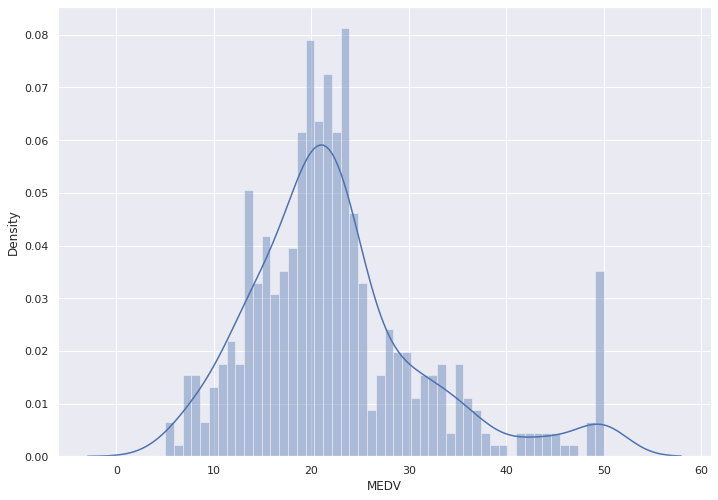

In [6]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['MEDV'], bins=50)
plt.show()

# Treinamento e aplicação do Adaline

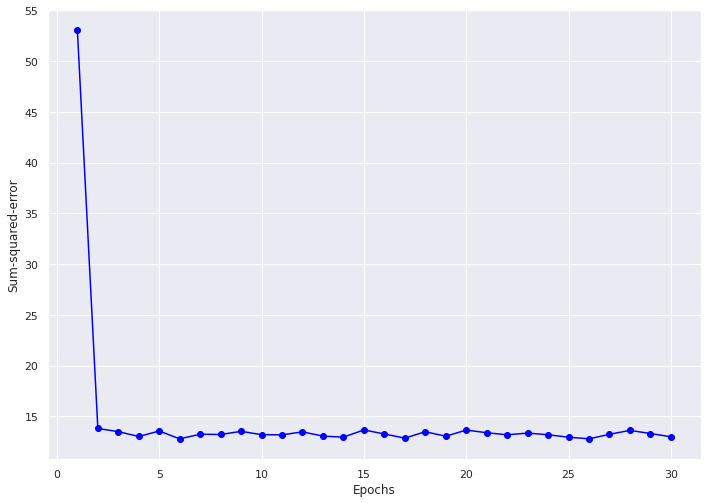

In [7]:
X = boston.iloc[:, 0:13].values
y = boston.iloc[:, 13].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Standardize the data
scaler = StandardScaler()
X_std_train = scaler.fit_transform(X_train)

# Create the AdalineSGD model
model1 = MySGDAdaline(learning_rate=0.01, max_iterations=30, tolerance=0.1)

# Train the model
model1.fit(X_std_train, y_train)

# Plot the training error
plt.plot(range(1, len(model1.epoch_errors) + 1), model1.epoch_errors, marker = 'o', color = 'blue')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()

In [8]:
# model evaluation for training set
y_train_predict = model1.predict(X_std_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
X_std_test = scaler.transform(X_test)
y_predicted = model1.predict(X_std_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_predicted)))
r2 = r2_score(y_test, y_predicted)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 4.943724044300042
R2 score is 0.7030652986084616


The model performance for testing set
--------------------------------------
RMSE is 4.415456181490587
R2 score is 0.7777822745513603


/home/vitor/-/.virtualenvs/k36/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


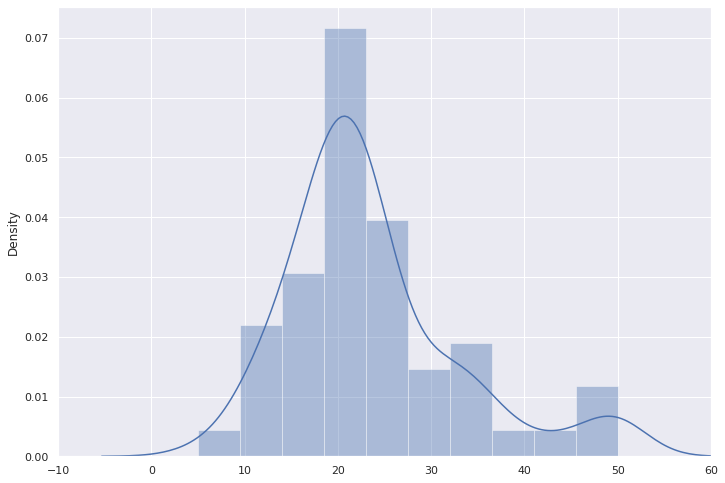

In [9]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(y_test, bins=10)
plt.xlim(-10, 60)
plt.show()

/home/vitor/-/.virtualenvs/k36/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


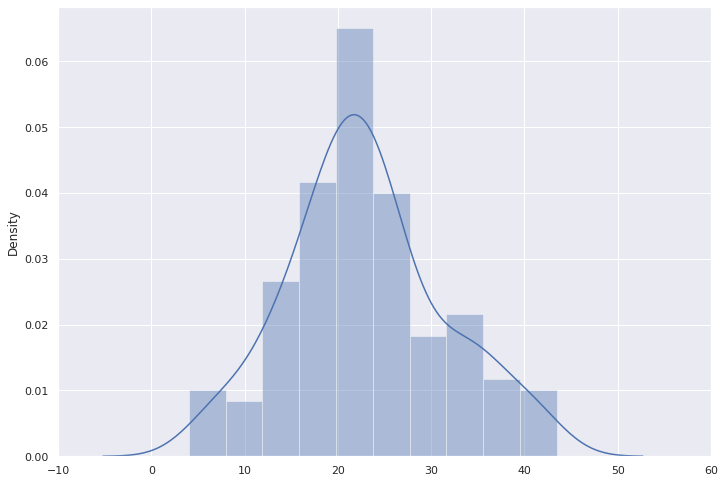

In [10]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(y_predicted, bins=10)
plt.xlim(-10, 60)
plt.show()

# Analisando a correlação das variáveis

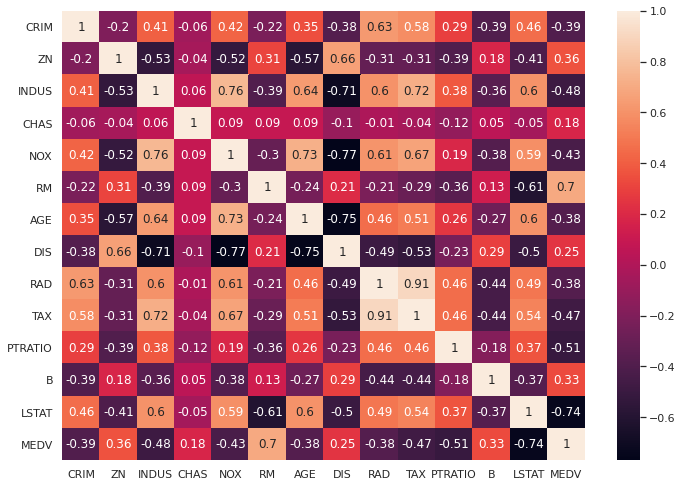

In [11]:
correlation_matrix = boston.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

# Geração de modelo desconsiderando variáveis altamente correlacionadas

Como as variáveis 9 e 10 apresentam alta correlação linear, então a variável 9 será excluída desse modelo. O mesmo ocorre para as features 5, 7 e 8 (por isso as variáveis 7 e 8 também não serão consideradas).

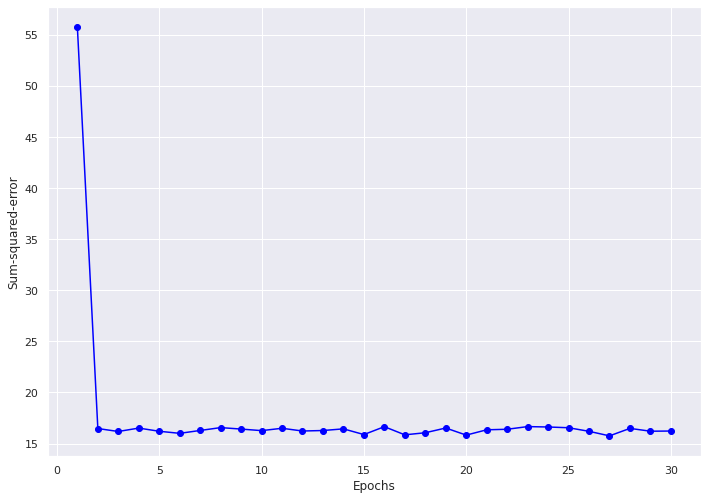

In [12]:
X = boston.drop(columns=["AGE", "DIS", "RAD", "MEDV"])
y = boston.iloc[:, 13].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Standardize the data
scaler = StandardScaler()
X_std_train = scaler.fit_transform(X_train)

# Create the AdalineSGD model
model1 = MySGDAdaline(learning_rate=0.01, max_iterations=30, tolerance=0.1)

# Train the model
model1.fit(X_std_train, y_train)

# Plot the training error
plt.plot(range(1, len(model1.epoch_errors) + 1), model1.epoch_errors, marker = 'o', color = 'blue')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()

In [13]:
# model evaluation for training set
y_train_predict = model1.predict(X_std_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
X_std_test = scaler.transform(X_test)
y_predicted = model1.predict(X_std_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_predicted)))
r2 = r2_score(y_test, y_predicted)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.446087834420718
R2 score is 0.6741399689596186


The model performance for testing set
--------------------------------------
RMSE is 4.314145937414254
R2 score is 0.730085230514005


# Geração de modelo considerando apenas as 3 variáveis mais correlacionadas com a variável MEDV

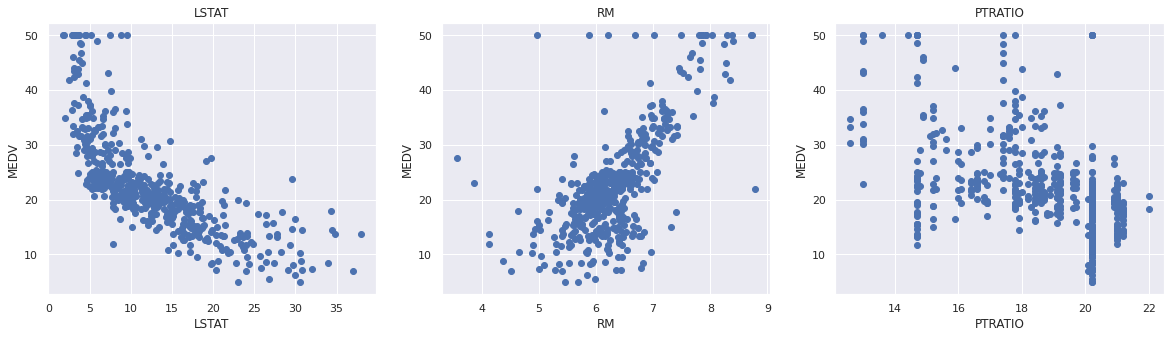

In [14]:
plt.figure(figsize=(20, 5))

features = ["LSTAT", "RM", "PTRATIO"]
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

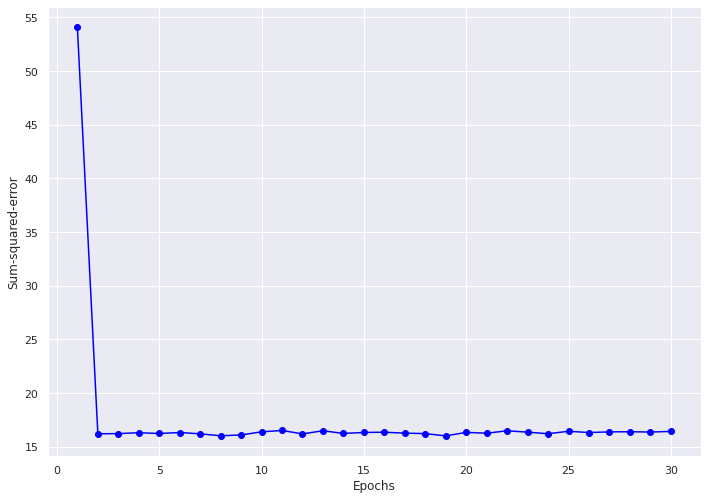

In [15]:
X = boston[["LSTAT", "RM", "PTRATIO"]]
y = boston.iloc[:, 13].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Standardize the data
scaler = StandardScaler()
X_std_train = scaler.fit_transform(X_train)

# Create the AdalineSGD model
model1 = MySGDAdaline(learning_rate=0.01, max_iterations=30, tolerance=0.1)

# Train the model
model1.fit(X_std_train, y_train)

# Plot the training error
plt.plot(range(1, len(model1.epoch_errors) + 1), model1.epoch_errors, marker = 'o', color = 'blue')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()

In [16]:
# model evaluation for training set
y_train_predict = model1.predict(X_std_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
X_std_test = scaler.transform(X_test)
y_predicted = model1.predict(X_std_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_predicted)))
r2 = r2_score(y_test, y_predicted)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.6045260596876005
R2 score is 0.6579336313206072


The model performance for testing set
--------------------------------------
RMSE is 4.310901545994087
R2 score is 0.7233285010926054


# Aplicação do PCA para escolha de features


In [17]:
rmse = np.zeros(20)
features_selected = [1,2,3,4,5,6,7,8,9,10,11,12,13]
X = boston.iloc[:, 0:13].values
for n_features in features_selected:
    for i in range(20):
        # Separate data between training and test:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
        X_std_train = scaler.fit_transform(X_train)
        X_std_test = scaler.transform(X_test)
        pca = PCA(n_components=n_features)
        pca.fit(X_std_train)
        PCs = pca.transform(X_std_train)
        clf = MySGDAdaline(learning_rate=0.01, max_iterations=30, tolerance=0.1)
        clf.fit(PCs[:, 0:n_features], y_train)
        X_test_pca = pca.transform(X_std_test)
        y_pred = clf.predict(X_test_pca[:, 0:n_features])
        rmse[i] = (np.sqrt(mean_squared_error(y_test, y_pred)))
    print("\nRMSE médio para modelo considerando " + str(n_features) + " features: " + '{:.3f}'.format(rmse.mean()) + " +/- " + '{:.3f}'.format(rmse.std()))


RMSE médio para modelo considerando 1 features: 7.406 +/- 0.664

RMSE médio para modelo considerando 2 features: 7.014 +/- 1.068

RMSE médio para modelo considerando 3 features: 5.787 +/- 0.694

RMSE médio para modelo considerando 4 features: 5.502 +/- 0.458

RMSE médio para modelo considerando 5 features: 5.321 +/- 0.751

RMSE médio para modelo considerando 6 features: 5.137 +/- 0.435

RMSE médio para modelo considerando 7 features: 5.126 +/- 0.580

RMSE médio para modelo considerando 8 features: 5.224 +/- 0.541

RMSE médio para modelo considerando 9 features: 5.476 +/- 0.615

RMSE médio para modelo considerando 10 features: 5.581 +/- 0.543

RMSE médio para modelo considerando 11 features: 5.266 +/- 0.594

RMSE médio para modelo considerando 12 features: 5.177 +/- 0.436

RMSE médio para modelo considerando 13 features: 5.095 +/- 0.451
